In [107]:
import sqlite3
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# read in DataFrames
boxoffice = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_info = pd.read_table('zippedData/rt.movie_info.tsv.gz')
reviews = pd.read_table('zippedData/rt.reviews.tsv.gz', encoding='windows-1252')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col = 0)
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col = 0)

# connect to imdb database
conn = sqlite3.connect('zippedData/im.db')
pd.read_sql("""SELECT * FROM movie_basics;""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [85]:

#join boxoffice, movies, movie_budgets, idmb database 
#could look at movie generes, the most popular and their budgets - how profitable?  
# look at date released and see what is popular currently 

In [86]:
# movie_info['director'].value_counts()

In [87]:
# reviews.info()

In [88]:
# reviews.publisher

In [89]:
# movies.info()

In [90]:
# movie_budgets.info()

In [91]:
# boxoffice.isnull().sum()

In [92]:
# movie_info.isnull().sum()

In [93]:
# movies.head()
# movies.set_index('original_title')

In [94]:
# boxoffice.set_index('title')

In [97]:
# boxoffice.info()

In [96]:
# movies.info()

In [98]:
# new_df = movies.merge(boxoffice)

In [99]:
# movie_budgets.set_index('movie')

In [100]:
# new_df = pd.concat([movies, boxoffice])
# new_df.shape

In [101]:
# new_df.dropna(subset=['original_title'])

In [102]:
import pandas as pd
import numpy as np
import sqlite3
from pandasql import sqldf

#load in data sets
boxoffice = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_info = pd.read_table('zippedData/rt.movie_info.tsv.gz')
reviews = pd.read_table('zippedData/rt.reviews.tsv.gz', encoding='windows-1252')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col=0)

#connect to database
conn = sqlite3.connect('zippedData/im.db')

pysqldf = lambda q: sqldf(q, globals())
joined = pd.read_sql("SELECT * FROM movie_basics mb JOIN movie_ratings mr ON mb.movie_id=mr.movie_id", conn)

q = """SELECT * FROM joined j JOIN movie_budgets mb ON mb.movie=j.primary_title JOIN movies m ON m.original_title=j.original_title"""
master_df = pysqldf(q).drop_duplicates(subset='primary_title', keep='first')

new_master_df = master_df.drop(["original_title", "id", "start_year", "movie", "title", "genre_ids", "original_language"], axis=1)
new_master_df = new_master_df.rename(columns={"vote_average": "tmdb_vote_average",
                                              "vote_count": "tmdb_vote_count", "averagerating": "imdb_average_rating", "numvotes": "imdb_vote_count"})
new_master_df["genres"] = new_master_df["genres"].str.split(',')

new_master_df

new_master_df['domestic_gross'] = new_master_df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
new_master_df['production_budget'] = new_master_df['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
new_master_df['worldwide_gross'] = new_master_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)
final_master_df = new_master_df
final_master_df

,movie_id,primary_title,runtime_minutes,genres,imdb_average_rating,imdb_vote_count,release_date,production_budget,domestic_gross,worldwide_gross,popularity,release_date,tmdb_vote_average,tmdb_vote_count
0,tt0249516,Foodfight!,91.0,"[Action, Animation, Comedy]",1.9,8248,"Dec 31, 2012",45000000,0,73706,4.705,2013-05-07,2.1,46
1,tt0326592,The Overnight,88.0,None,7.5,24,"Jun 19, 2015",200000,1109808,1165996,6.576,2015-06-19,6.0,200
2,tt0337692,On the Road,124.0,"[Adventure, Drama, Romance]",6.1,37886,"Mar 22, 2013",25000000,720828,9313302,8.919,2012-12-21,5.6,518
3,tt0359950,The Secret Life of Walter Mitty,114.0,"[Adventure, Comedy, Drama]",7.3,275300,"Dec 25, 2013",91000000,58236838,187861183,10.743,2013-12-25,7.1,4859
4,tt0365907,A Walk Among the Tombstones,114.0,"[Action, Crime, Drama]",6.5,105116,"Sep 19, 2014",28000000,26017685,62108587,19.373,2014-09-19,6.3,1685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,tt7401588,Instant Family,118.0,"[Comedy, Drama]",7.4,46728,"Nov 16, 2018",48000000,67363237,119736188,22.634,2018-11-16,7.6,782
2839,tt7766254,Big,99.0,[Documentary],8.5,6,"Jun 3, 1988",18000000,114968774,151668774,15.031,1988-06-03,7.0,1813
2841,tt7784604,Hereditary,127.0,"[Drama, Horror, Mystery]",7.3,151571,"Jun 8, 2018",10000000,44069456,70133905,26.185,2018-06-08,7.0,2491
2848,tt8043306,Teefa in Trouble,155.0,"[Action, Comedy, Crime]",7.4,2724,"Jul 20, 2018",1500000,0,98806,4.486,2018-07-20,7.6,11


In [131]:
final_master_df['domestic_profit'] = final_master_df['domestic_gross'] - final_master_df['production_budget']
final_master_df['worldwide_profit'] = final_master_df['worldwide_gross'] - final_master_df['production_budget']
final_master_df

,movie_id,primary_title,runtime_minutes,genres,imdb_average_rating,imdb_vote_count,release_date,production_budget,domestic_gross,worldwide_gross,popularity,release_date,tmdb_vote_average,tmdb_vote_count,domestic_profit,worldwide_profit
0,tt0249516,Foodfight!,91.0,"[Action, Animation, Comedy]",1.9,8248,"Dec 31, 2012",45000000,0,73706,4.705,2013-05-07,2.1,46,-45000000,-44926294
1,tt0326592,The Overnight,88.0,None,7.5,24,"Jun 19, 2015",200000,1109808,1165996,6.576,2015-06-19,6.0,200,909808,965996
2,tt0337692,On the Road,124.0,"[Adventure, Drama, Romance]",6.1,37886,"Mar 22, 2013",25000000,720828,9313302,8.919,2012-12-21,5.6,518,-24279172,-15686698
3,tt0359950,The Secret Life of Walter Mitty,114.0,"[Adventure, Comedy, Drama]",7.3,275300,"Dec 25, 2013",91000000,58236838,187861183,10.743,2013-12-25,7.1,4859,-32763162,96861183
4,tt0365907,A Walk Among the Tombstones,114.0,"[Action, Crime, Drama]",6.5,105116,"Sep 19, 2014",28000000,26017685,62108587,19.373,2014-09-19,6.3,1685,-1982315,34108587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2825,tt7401588,Instant Family,118.0,"[Comedy, Drama]",7.4,46728,"Nov 16, 2018",48000000,67363237,119736188,22.634,2018-11-16,7.6,782,19363237,71736188
2839,tt7766254,Big,99.0,[Documentary],8.5,6,"Jun 3, 1988",18000000,114968774,151668774,15.031,1988-06-03,7.0,1813,96968774,133668774
2841,tt7784604,Hereditary,127.0,"[Drama, Horror, Mystery]",7.3,151571,"Jun 8, 2018",10000000,44069456,70133905,26.185,2018-06-08,7.0,2491,34069456,60133905
2848,tt8043306,Teefa in Trouble,155.0,"[Action, Comedy, Crime]",7.4,2724,"Jul 20, 2018",1500000,0,98806,4.486,2018-07-20,7.6,11,-1500000,-1401194


In [132]:
# final_master_df.describe()

In [133]:
final = final_master_df

In [134]:
final = final.drop(['release_date'], axis=1)

In [135]:
final['genres'] = final['genres'].dropna()

<ipython-input-135-2aea57bde019>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['genres'] = final['genres'].dropna()


In [143]:
final = final.dropna()

In [144]:
final.isnull().sum()

movie_id               0
primary_title          0
runtime_minutes        0
genres                 0
imdb_average_rating    0
imdb_vote_count        0
production_budget      0
domestic_gross         0
worldwide_gross        0
popularity             0
tmdb_vote_average      0
tmdb_vote_count        0
domestic_profit        0
worldwide_profit       0
dtype: int64

In [145]:
final.reset_index(drop=True)

,movie_id,primary_title,runtime_minutes,genres,imdb_average_rating,imdb_vote_count,production_budget,domestic_gross,worldwide_gross,popularity,tmdb_vote_average,tmdb_vote_count,domestic_profit,worldwide_profit
0,tt0249516,Foodfight!,91.0,"[Action, Animation, Comedy]",1.9,8248,45000000,0,73706,4.705,2.1,46,-45000000,-44926294
1,tt0337692,On the Road,124.0,"[Adventure, Drama, Romance]",6.1,37886,25000000,720828,9313302,8.919,5.6,518,-24279172,-15686698
2,tt0359950,The Secret Life of Walter Mitty,114.0,"[Adventure, Comedy, Drama]",7.3,275300,91000000,58236838,187861183,10.743,7.1,4859,-32763162,96861183
3,tt0365907,A Walk Among the Tombstones,114.0,"[Action, Crime, Drama]",6.5,105116,28000000,26017685,62108587,19.373,6.3,1685,-1982315,34108587
4,tt0369610,Jurassic World,124.0,"[Action, Adventure, Sci-Fi]",7.0,539338,215000000,652270625,1648854864,20.709,6.6,14056,437270625,1433854864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,tt7401588,Instant Family,118.0,"[Comedy, Drama]",7.4,46728,48000000,67363237,119736188,22.634,7.6,782,19363237,71736188
1726,tt7766254,Big,99.0,[Documentary],8.5,6,18000000,114968774,151668774,15.031,7.0,1813,96968774,133668774
1727,tt7784604,Hereditary,127.0,"[Drama, Horror, Mystery]",7.3,151571,10000000,44069456,70133905,26.185,7.0,2491,34069456,60133905
1728,tt8043306,Teefa in Trouble,155.0,"[Action, Comedy, Crime]",7.4,2724,1500000,0,98806,4.486,7.6,11,-1500000,-1401194


In [119]:
np.unique(final.columns.values)

array(['domestic_gross', 'domestic_profit', 'genres',
       'imdb_average_rating', 'imdb_vote_count', 'movie_id', 'popularity',
       'primary_title', 'production_budget', 'release_date',
       'runtime_minutes', 'tmdb_vote_average', 'tmdb_vote_count',
       'worldwide_gross', 'worldwide_profit'], dtype=object)

In [158]:
final = final.explode('genres')
final

,movie_id,primary_title,runtime_minutes,genres,imdb_average_rating,imdb_vote_count,production_budget,domestic_gross,worldwide_gross,popularity,tmdb_vote_average,tmdb_vote_count,domestic_profit,worldwide_profit
0,tt0249516,Foodfight!,91.0,Action,1.9,8248,45000000,0,73706,4.705,2.1,46,-45000000,-44926294
0,tt0249516,Foodfight!,91.0,Animation,1.9,8248,45000000,0,73706,4.705,2.1,46,-45000000,-44926294
0,tt0249516,Foodfight!,91.0,Comedy,1.9,8248,45000000,0,73706,4.705,2.1,46,-45000000,-44926294
2,tt0337692,On the Road,124.0,Adventure,6.1,37886,25000000,720828,9313302,8.919,5.6,518,-24279172,-15686698
2,tt0337692,On the Road,124.0,Drama,6.1,37886,25000000,720828,9313302,8.919,5.6,518,-24279172,-15686698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,tt7784604,Hereditary,127.0,Mystery,7.3,151571,10000000,44069456,70133905,26.185,7.0,2491,34069456,60133905
2848,tt8043306,Teefa in Trouble,155.0,Action,7.4,2724,1500000,0,98806,4.486,7.6,11,-1500000,-1401194
2848,tt8043306,Teefa in Trouble,155.0,Comedy,7.4,2724,1500000,0,98806,4.486,7.6,11,-1500000,-1401194
2848,tt8043306,Teefa in Trouble,155.0,Crime,7.4,2724,1500000,0,98806,4.486,7.6,11,-1500000,-1401194


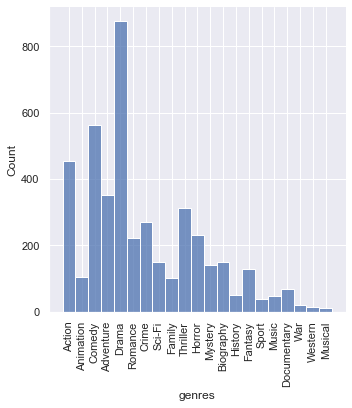

In [157]:
pt = sns.displot(final.genres)
pt.set_xticklabels(rotation=90)

<AxesSubplot:xlabel='domestic_profit', ylabel='popularity'>

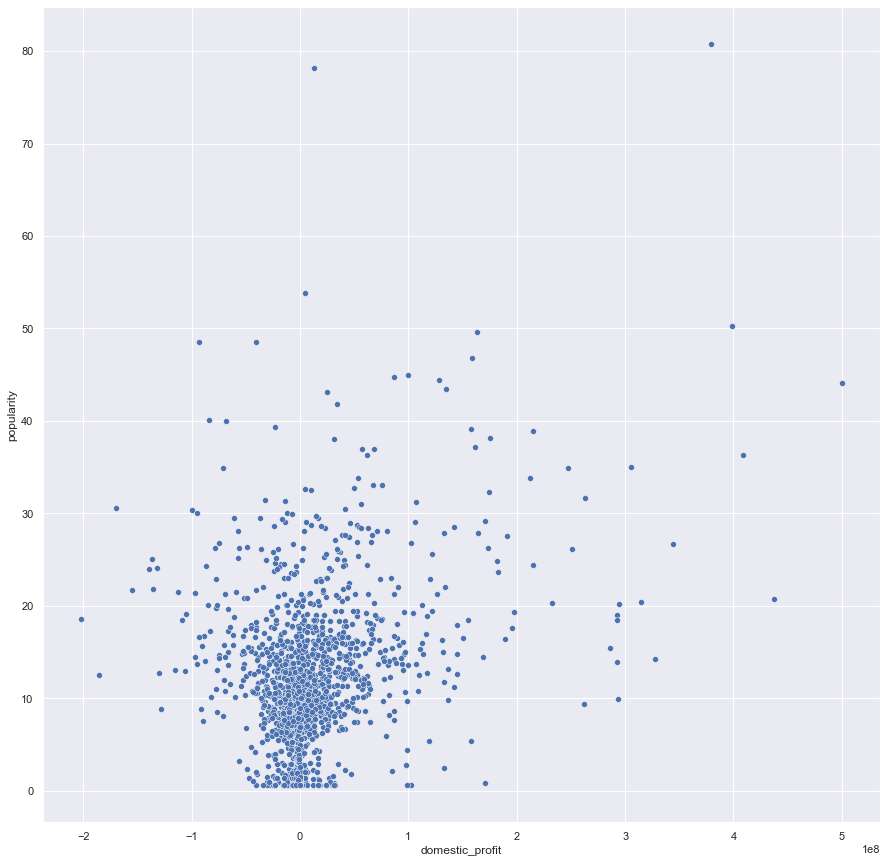

In [64]:
sns.scatterplot(y=final_master_df['popularity'], x=final_master_df['domestic_profit'] )

<AxesSubplot:xlabel='domestic_profit', ylabel='runtime_minutes'>

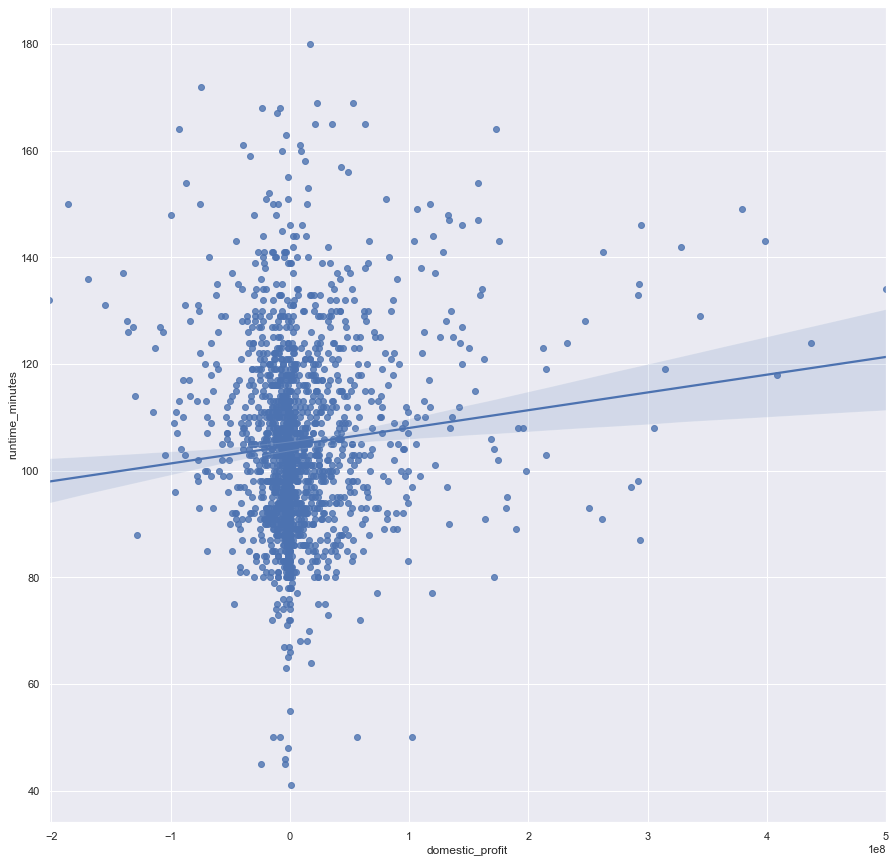

In [33]:
sns.regplot(y=new_master_df['runtime_minutes'], x=new_master_df['domestic_profit'] )

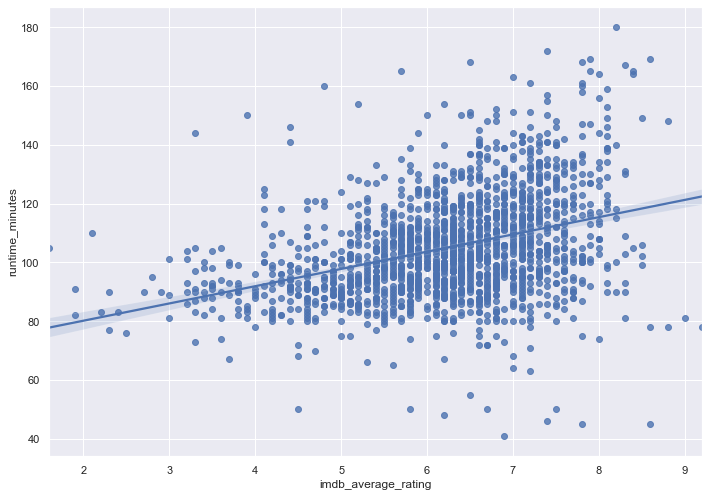

In [31]:
sns.regplot(y=new_master_df['runtime_minutes'], x=new_master_df['imdb_average_rating'])
sns.set(rc={'figure.figsize':(15,15)})

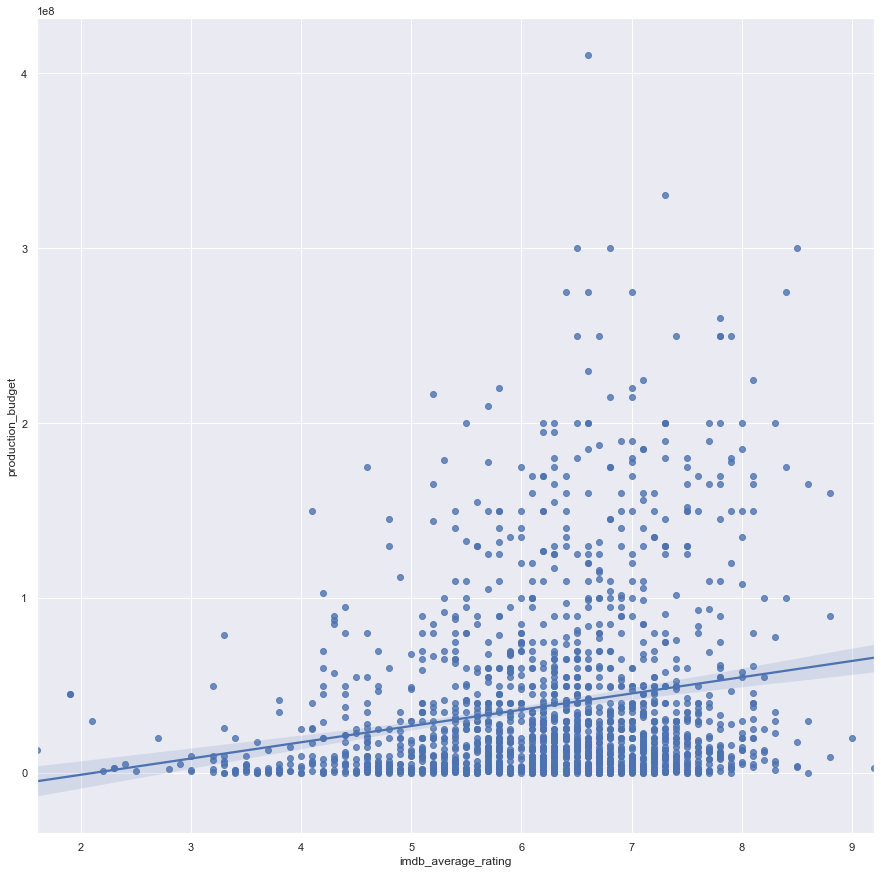

In [32]:
sns.regplot(x=new_master_df['imdb_average_rating'], y=new_master_df['production_budget'] )
sns.set(rc={'figure.figsize':(15,15)})

In [38]:
new_master_df.corr()

,runtime_minutes,imdb_average_rating,imdb_vote_count,production_budget,domestic_gross,worldwide_gross,popularity,tmdb_vote_average,tmdb_vote_count,domestic_profit,worldwide_profit
runtime_minutes,1.000000,0.364189,0.462364,0.380913,0.321494,0.329389,0.401271,0.337634,0.419635,0.100401,0.289403
imdb_average_rating,0.364189,1.000000,0.445326,0.199200,0.270524,0.253997,0.331876,0.725077,0.392224,0.200964,0.251061
imdb_vote_count,0.462364,0.445326,1.000000,0.558319,0.656142,0.648792,0.606784,0.378856,0.906138,0.415001,0.626639
production_budget,0.380913,0.199200,0.558319,1.000000,0.728073,0.799145,0.615160,0.171364,0.651989,0.093908,0.679399
domestic_gross,0.321494,0.270524,0.656142,0.728073,1.000000,0.946672,0.617977,0.270043,0.774016,0.750842,0.939984
worldwide_gross,0.329389,0.253997,0.648792,0.799145,0.946672,1.000000,0.638608,0.250508,0.780004,0.604914,0.984035
popularity,0.401271,0.331876,0.606784,0.615160,0.617977,0.638608,1.000000,0.334689,0.718047,0.304805,0.597379
tmdb_vote_average,0.337634,0.725077,0.378856,0.171364,0.270043,0.250508,0.334689,1.000000,0.377115,0.227086,0.255043
tmdb_vote_count,0.419635,0.392224,0.906138,0.651989,0.774016,0.780004,0.718047,0.377115,1.000000,0.495943,0.759068
domestic_profit,0.100401,0.200964,0.415001,0.093908,0.750842,0.604914,0.304805,0.227086,0.495943,1.000000,0.710575


<AxesSubplot:>

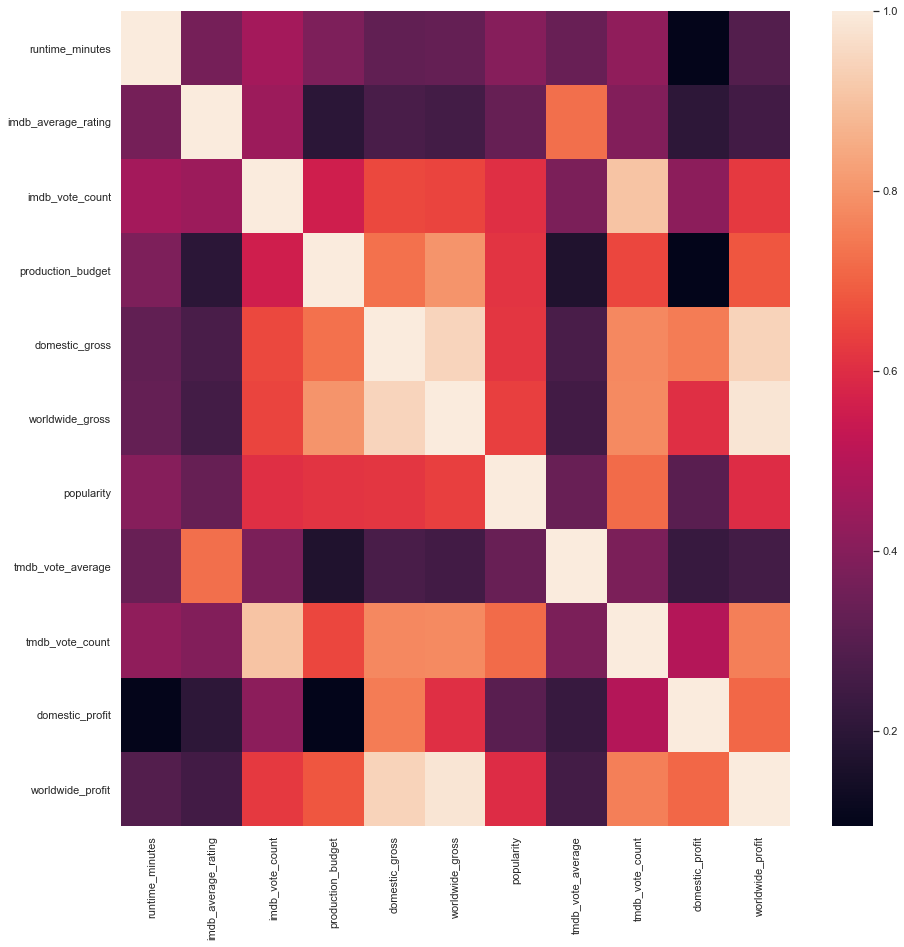

In [40]:
sns.heatmap(new_master_df.corr())

In [83]:
# new_master_df['genres'] = new_master_df['genres'].split(',')

final['genres'] = final['genres'].dropna()
# explode = new_master_df.explode(new_master_df['genres'])
final

,index,movie_id,primary_title,runtime_minutes,genres,imdb_average_rating,imdb_vote_count,release_date,production_budget,domestic_gross,worldwide_gross,popularity,release_date,tmdb_vote_average,tmdb_vote_count,domestic_profit,worldwide_profit
0,0,tt0249516,Foodfight!,91.0,"[Action, Animation, Comedy]",1.9,8248,"Dec 31, 2012",45000000,0,73706,4.705,2013-05-07,2.1,46,-45000000,-44926294
1,1,tt0326592,The Overnight,88.0,NaN,7.5,24,"Jun 19, 2015",200000,1109808,1165996,6.576,2015-06-19,6.0,200,909808,965996
2,2,tt0337692,On the Road,124.0,"[Adventure, Drama, Romance]",6.1,37886,"Mar 22, 2013",25000000,720828,9313302,8.919,2012-12-21,5.6,518,-24279172,-15686698
3,3,tt0359950,The Secret Life of Walter Mitty,114.0,"[Adventure, Comedy, Drama]",7.3,275300,"Dec 25, 2013",91000000,58236838,187861183,10.743,2013-12-25,7.1,4859,-32763162,96861183
4,4,tt0365907,A Walk Among the Tombstones,114.0,"[Action, Crime, Drama]",6.5,105116,"Sep 19, 2014",28000000,26017685,62108587,19.373,2014-09-19,6.3,1685,-1982315,34108587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1745,tt7401588,Instant Family,118.0,"[Comedy, Drama]",7.4,46728,"Nov 16, 2018",48000000,67363237,119736188,22.634,2018-11-16,7.6,782,19363237,71736188
1746,1746,tt7766254,Big,99.0,[Documentary],8.5,6,"Jun 3, 1988",18000000,114968774,151668774,15.031,1988-06-03,7.0,1813,96968774,133668774
1747,1747,tt7784604,Hereditary,127.0,"[Drama, Horror, Mystery]",7.3,151571,"Jun 8, 2018",10000000,44069456,70133905,26.185,2018-06-08,7.0,2491,34069456,60133905
1748,1748,tt8043306,Teefa in Trouble,155.0,"[Action, Comedy, Crime]",7.4,2724,"Jul 20, 2018",1500000,0,98806,4.486,2018-07-20,7.6,11,-1500000,-1401194


In [81]:
final.explode('genres')

ValueError: columns must be unique